In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [19]:
df_gender = pd.read_csv("gender-classifier.csv" ,encoding='latin1')

In [21]:
df_gender.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [22]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

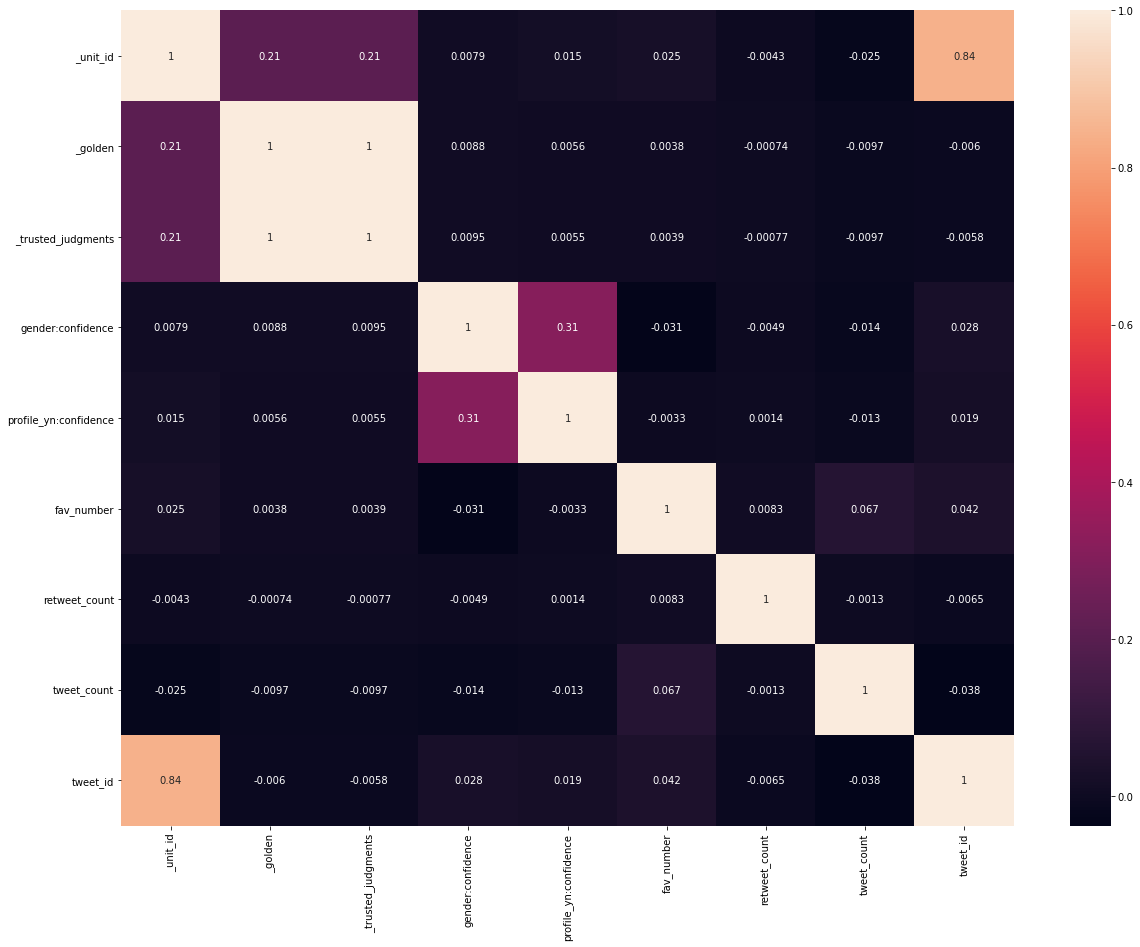

In [23]:
sns.heatmap(df_gender.corr(),annot = True)
plt.rcParams["figure.figsize"]=20,15

In [30]:
df_gender.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

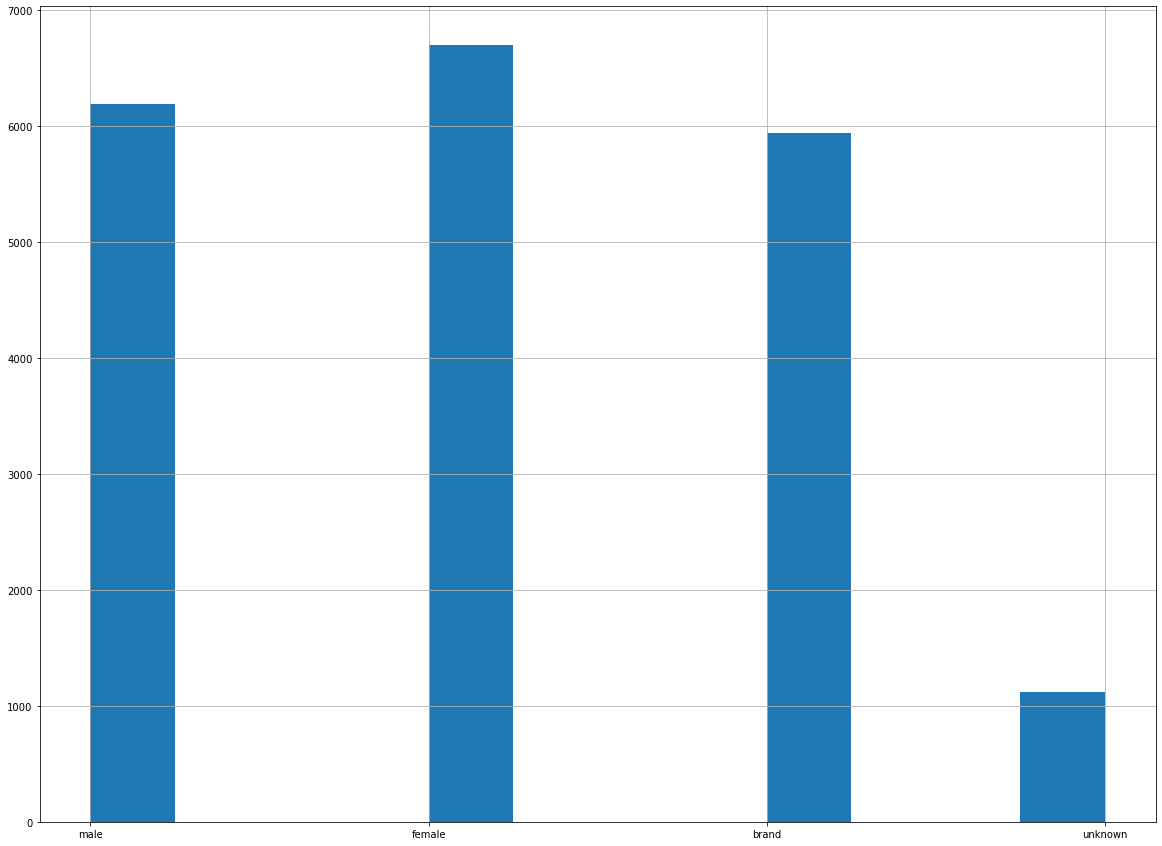

In [25]:
df_gender['gender'].hist(bins=12)

In [28]:
df_gender['gender'].fillna(df_gender['gender'].mode()[0])

0          male
1          male
2          male
3          male
4        female
          ...  
20045    female
20046      male
20047      male
20048    female
20049    female
Name: gender, Length: 20050, dtype: object

In [31]:
df_gender['gender'].replace(to_replace = 'unknown' ,value = 'male' ,inplace = True)

In [33]:
df_gender.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [34]:
df_gender['description'].fillna(df_gender['description'].mode()[0],inplace = True)

In [35]:
import re 


In [92]:
def normalize_text(text):
    
    text = str(text)
    text = text.lower()
        
    text = re.sub('\s\W',' ',text)
    text = re.sub('\W\s',' ',text)
        
    text = re.sub('\s+',' ',text)
    text = re.sub('[^\x00-\x7F]+',' ', text)
    text = re.sub('https?:\/\/.*[\r\n]*', ' ', text)
    text = re.sub('[?!+%{}:;.,"\'()\[\]_]', '',text)
    text = re.sub('\s+',' ',text)
    return text

df['text_norm'] = [normalize_text(s) for s in df['text']]
df['description_norm'] = [normalize_text(s) for s in df['description']]

In [95]:
df['description_norm']

0                                     i sing my own rhythm
1        im the author of novels filled with family dra...
3        mobile guy 49ers shazam google kleiner perkins...
4        ricky wilson the best frontman/kaiser chiefs t...
5                                         you dont know me
                               ...                        
20044                                    i love memyself&i
20045                                                   rp
20046    whatever you like its not a problem at all 9/1...
20047    #teambarcelona you look lost so you should fol...
20049                        teamwork makes the dream work
Name: description_norm, Length: 13926, dtype: object

In [96]:
df.reset_index(inplace = True)

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#vectorizer = vectorizer.fit(df.ix[train_rows, :]["text_norm"])
vectorizer.fit_transform(df['text_norm'])

<13926x26811 sparse matrix of type '<class 'numpy.int64'>'
	with 185850 stored elements in Compressed Sparse Row format>

In [99]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [101]:
cat_col = ['_unit_state','text_norm', 'description_norm','sidebar_color','link_color', 'name', 'profileimage',
          'created', 'description', 'profile_yn','gender',]

In [102]:
for each_col in cat_col:
    df[each_col] = le.fit_transform(df[each_col])

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [107]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [108]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [109]:
clf.predict_proba(X_test)

array([[0.31640899, 0.58072255, 0.10286847],
       [0.31640899, 0.58072255, 0.10286847],
       [0.31640899, 0.58072255, 0.10286847],
       ...,
       [0.31640899, 0.58072255, 0.10286847],
       [0.31640899, 0.58072255, 0.10286847],
       [0.31640899, 0.58072255, 0.10286847]])

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
accuracy_score(y_test, y_pred)

0.38008616562948777

In [115]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [116]:
nb = MultinomialNB()
nb = nb.fit(X_train, y_train)
print(classification_report(y_test, nb.predict(X_test)))
accuracy_score(y_test, nb.predict(X_test))

              precision    recall  f1-score   support

           0       0.51      0.38      0.44      1144
           1       0.65      0.18      0.29      1588
           2       0.38      0.75      0.51      1446

    accuracy                           0.44      4178
   macro avg       0.51      0.44      0.41      4178
weighted avg       0.52      0.44      0.40      4178



0.4360938247965534